In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import csv
!set low_memory=False

In [30]:
rows_count=[]
names = []

In [31]:
path = "E:\Projetos\Olist\datasets_originais"
names = os.listdir(path)

In [33]:
#datasets load (Dataframe model)
olist_customer_dataset = pd.read_csv("../datasets_originais/olist_customers_dataset.csv")
olist_geolocation_dataset = pd.read_csv("../datasets_originais/olist_geolocation_dataset.csv")
olist_order_items_dataset = pd.read_csv("../datasets_originais/olist_order_items_dataset.csv")
olist_order_payments_dataset = pd.read_csv("../datasets_originais/olist_order_payments_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("../datasets_originais/olist_order_reviews_dataset.csv")
olist_orders_dataset = pd.read_csv("../datasets_originais/olist_orders_dataset.csv")
olist_products_dataset = pd.read_csv("../datasets_originais/olist_products_dataset.csv")
olist_sellers_dataset = pd.read_csv("../datasets_originais/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("../datasets_originais/product_category_name_translation.csv")

In [34]:
rows_count.append(len(olist_customer_dataset.index))
rows_count.append(len(olist_geolocation_dataset.index))
rows_count.append(len(olist_order_items_dataset.index))
rows_count.append(len(olist_order_payments_dataset.index))
rows_count.append(len(olist_order_reviews_dataset.index))
rows_count.append(len(olist_orders_dataset.index))
rows_count.append(len(olist_products_dataset.index))
rows_count.append(len(olist_sellers_dataset.index))
rows_count.append(len(product_category_name_translation.index))

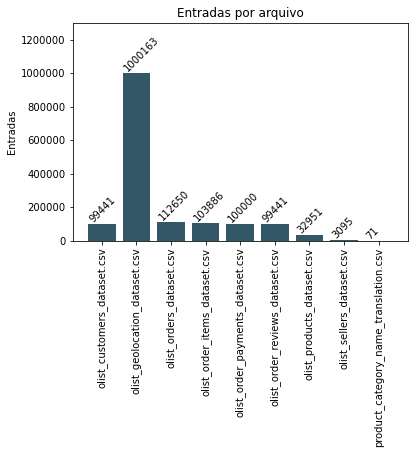

In [35]:
y_pos = np.arange(len(names))

bars = plt.bar(y_pos, rows_count, align='center', alpha=0.8,color='#002d41')
plt.xticks(y_pos, names,rotation=90)
plt.ylabel('Entradas')
plt.title('Entradas por arquivo')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 10000, yval,rotation=45)
plt.margins(y=0.3)
plt.show()

#y_pos = np.arange(len(rows_count))
#plt.bar(y_pos, rows_count)
#plt.xticks(y_pos, names, rotation=90)
#plt.subplots_adjust(bottom=0.4, top=0.99)
#plt.show()

In [36]:
#infos
#
olist_customer_dataset.info()
#
olist_geolocation_dataset.info()
#
olist_order_items_dataset.info()
#convertido
olist_order_payments_dataset.info()
#convertido
olist_order_reviews_dataset.columns = ['review_id','order_id','review_score','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','7','8','9','10','11','12']
olist_order_reviews_dataset.info()
#
olist_orders_dataset.info()
#
olist_products_dataset.info()
#
olist_sellers_dataset.info()
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

In [12]:
olist_customer_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,7,8,9,10,11,12
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN,NaN,NaN,NaN,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN,NaN,NaN,NaN,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN,NaN,NaN,NaN,NaN,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,NaN,NaN,NaN,NaN,NaN,NaN
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [21]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [22]:
olist_order_payments_dataset.to_csv(r'..\datasets_novos\olist_order_payments_dataset_v2.csv', index = False,quotechar='"', quoting=csv.QUOTE_NONNUMERIC)

In [23]:
analysis_olist_order_reviews_dataset = olist_order_reviews_dataset.dropna(subset=['7'])
#[olist_order_reviews_dataset[7].notna()]
#df.dropna(subset=[1])

In [24]:
analysis_olist_order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,7,8,9,10,11,12
597,88b1ded591cdd8c4f48c5285c7599392,d5c8ece04dd0b02a4e72e1938194dd22,5,NaN,Estou muito satisfeita com a minha compra e co...,dentro do prazo!,2018-05-03 00:00:00,2018-05-03 23:15:03,NaN,NaN,NaN,NaN,NaN
1903,3d5f2e0e1f5266ce5e7777980844b32c,c89c6f13b7d0296a4910796f47fe85f4,5,NaN,Muito bom. Entrega antecipada faz a diferença,NaN,2018-01-14 00:00:00,2018-01-19 16:40:41,NaN,NaN,NaN,NaN,NaN
2304,50159be3324818783d2662534eb31484,627dd35dbc686a525aa1224e523d82f8,3,bom,o produto é bom a entrega é rapida,mas frete muito caro.,2018-08-04 00:00:00,2018-08-05 02:26:50,NaN,NaN,NaN,NaN,NaN
3043,a3d0aa1ade63a7d134d25472cb4f659b,1ff6183537eb3a189de77b309ed28ad1,1,NaN,a quase um mês foi feito o pedido do relógio e...,LOJAS OSLIT PRA MIM TA FORA. lannister SEM PR...,2018-02-04 00:00:00,2018-02-05 05:05:53,NaN,NaN,NaN,NaN,NaN
4025,25cac81072dcb50ac7af0084057be701,785ceb77eb42e247a85b8e65c7724ac8,5,SUPER RECOMENDO,EMPRESA SERIA ENTREGOU ANTES DO PRAZO,RECOMENDO A TODOS,2018-06-19 00:00:00,2018-06-20 13:39:53,NaN,NaN,NaN,NaN,NaN
5466,4792d217cf0a153721cc2f1cf3e37b1b,759aedc35b7caf0ca563b0b72614e9d5,5,Super recomendo,Entrega pontual,ótimo produto,bom preço. Tudo certinho!!,2018-08-10 00:00:00,2018-08-13 16:51:32,NaN,NaN,NaN,NaN
5954,8919c1381e22a5898703cbf19bef546d,cccd9de9d481ae418dd03dde0ca78106,5,NaN,Recomendo... prefeito,NaN,2017-11-11 00:00:00,2017-11-11 23:52:59,NaN,NaN,NaN,NaN,NaN
9250,d15624b6cd728bb0a34a573a4d3b0154,4e4bb6dacb3e7da91a40dfc6efcf7ccf,5,NaN,Produto corresponde exatamente à descrição. Ma...,muito bonito e estiloso. Comprei para ciclism...,2017-04-06 00:00:00,2017-04-07 14:56:26,NaN,NaN,NaN,NaN,NaN
9633,917bbc4d06713199d351f697f0442dba,a3868921c7af20ac7aafb5e8b7b5b4ba,5,NaN,Chegou antes do prazo! Valeu !!,NaN,2018-02-17 00:00:00,2018-02-18 11:52:10,NaN,NaN,NaN,NaN,NaN
10830,8c7973642f29811d6088fbb2864ff2eb,8ef12780aa1f3903b1d9ab621f69abfb,1,NaN,Comprei Três pneus para bros,um aro 17 e 2 aro 19 mas até agora só chegara...,2017-11-14 00:00:00,2017-11-16 08:26:56,NaN,NaN,NaN,NaN,NaN


In [25]:
olist_order_reviews_dataset_v2=olist_order_reviews_dataset[olist_order_reviews_dataset['7'].isnull()]
olist_order_reviews_dataset_v3=olist_order_reviews_dataset_v2.drop(['7','8','9','10','11','12'], axis=1)

In [26]:
olist_order_reviews_dataset_v3
olist_order_reviews_dataset_v3.to_csv(r'..\datasets_novos\olist_order_reviews_dataset_v3.csv', index = False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)

In [27]:
olist_orders_dataset.to_csv(r'..\datasets_novos\olist_orders_dataset_v2.csv', index = False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)


In [39]:
olist_geolocation_dataset['geolocation_city'] = olist_geolocation_dataset['geolocation_city'].str.normalize('NFKD')\
    .str.encode('ascii', errors='ignore')\
    .str.decode('utf-8')
#olist_geolocation_dataset['geolocation_city']
olist_geolocation_dataset.to_csv(r'..\datasets_novos\olist_geolocation_dataset_v2.csv', index = False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)